In [1]:
from astropy.io import fits
import numpy as np
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import astropy.units as u
from fil_finder import FilFinder2D #, Filament2D
from scipy.optimize import curve_fit
########################
import aplpy
import copy
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (18., 9.6)

In [2]:
d, bmaj = 10, 0.2706

# fits_pwd = "test_1_-50_-30.fits"
# fits_pwd = "/home/filament/Desktop/fil-test/integ_fits/AIT/region1/test_1_70_100.fits"
# fits_pwd = "/home/filament/Desktop/fil_result/integ_fits/test_1_-100_-70.fits"
fits_pwd = "/home/filament/Desktop/fil_result/center_move/region1/region1_V3_p120_m45.fits"
hdu = fits.open(fits_pwd)[0]
hdr1 = hdu.header

integ_hdu = hdu
w = WCS(hdu)

In [3]:
hdr1

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2000                                                  
NAXIS2  =                 1200                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CTYPE1  = 'GLON-AIT'                                                            
CTYPE2  = 'GLAT-AIT'                                                            
CRVAL1  =             120.0000                                                  
CRVAL2  =             -45.00

In [4]:
fits_name = fits_pwd.split("/")[7].split(".")[0]
fits_name

'region1_V3_p120_m45'

In [5]:
if fits_name.split("_")[1] == str(1):
    region_name = "region1"
elif fits_name.split("_")[1] == str(2):
    region_name = "region2"
elif fits_name.split("_")[1] == str(3):
    region_name = "region3"
elif fits_name.split("_")[1] == str(4):
    region_name = "region4"
elif fits_name.split("_")[1] == str(5):
    region_name = "region5"
elif fits_name.split("_")[1] == str(6):
    region_name = "region6"

In [6]:
region_name = fits_name.split("_")[0]
region_name

'region1'

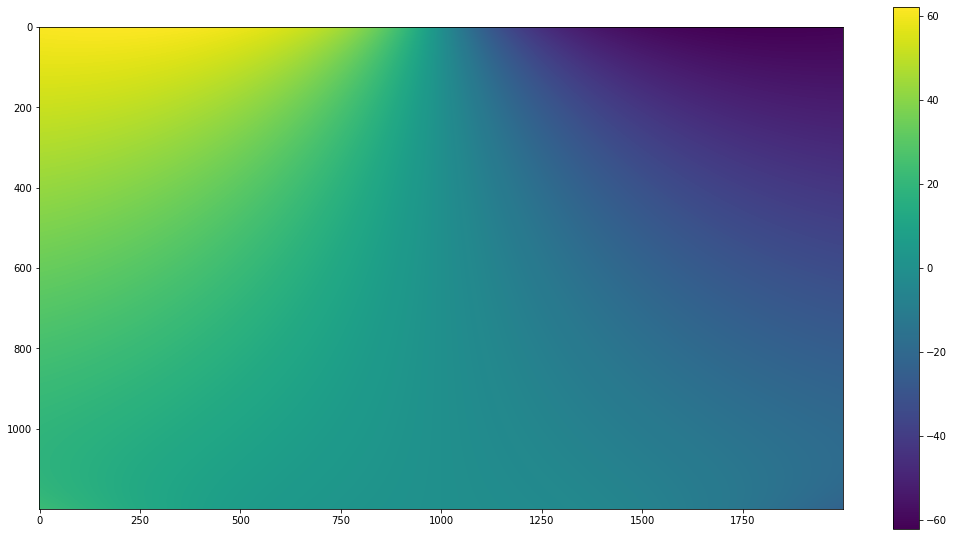

In [7]:
lean_ls = []
pa_deg_map = np.zeros(hdu.data.shape)
for i in range(hdu.data.shape[1]):
    for j in range(hdu.data.shape[0]):

        pos = w.wcs_pix2world(i, j, 0)
        if np.isnan(pos[0])==True or np.isnan(pos[1])==True:
            lean_ls.append(0)
            pa_deg_map[[j],[i]]=np.nan
            continue
        slide_plus = np.array([pos[0], pos[1]+0.0001])
        slide_minus = np.array([pos[0], pos[1]-0.0001])
        slide_plus_pix = w.wcs_world2pix(slide_plus[0], slide_plus[1], 0)
        slide_minus_pix = w.wcs_world2pix(slide_minus[0], slide_minus[1], 0)
        vec = np.array(slide_plus_pix) - np.array(slide_minus_pix)
        lean = -vec[0]/vec[1]  #
        lean_ls.append(np.rad2deg(np.arctan(lean)))
        pa_deg_map[[j],[i]]=np.rad2deg(np.arctan(lean))
plt.imshow(pa_deg_map)
plt.colorbar()

(1200, 2000)


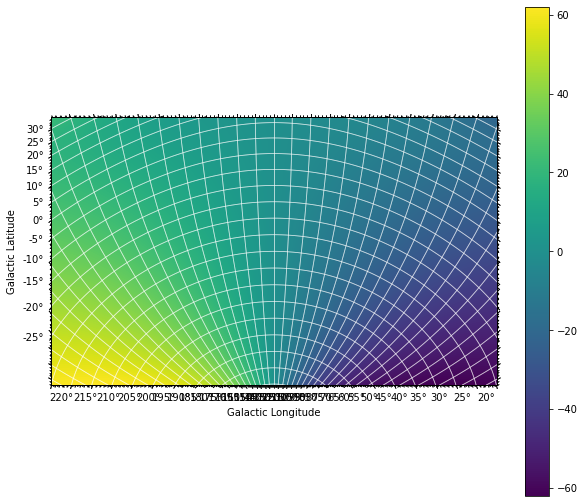

In [8]:
fig = aplpy.FITSFigure(hdu,slices=[0])
print(pa_deg_map.shape)

plt.imshow(pa_deg_map)
fig.add_grid()
plt.colorbar()

fig.ticks.set_xspacing(5)
fig.ticks.set_yspacing(5)

In [9]:
# def v2ch(v, w): # v(km/s)をchに変える
#     x_tempo, y_tempo, v_tempo   = w.wcs_pix2world(0, 0, 0, 0)
#     x_ch, y_ch, v_ch   = w.wcs_world2pix(x_tempo, y_tempo, v*1000.0, 0)
#     v_ch = int(round(float(v_ch), 0))
#     return v_ch

# def del_header_key(header, keys): # headerのkeyを消す
#     import copy
#     h = copy.deepcopy(header)
#     for k in keys:
#         try:
#             del h[k]
#         except:
#             pass
#     return h
# def make_new_hdu_integ(hdu, v_start_wcs, v_end_wcs, w): # 積分強度のhduを作る
#     data = hdu.data
#     header = hdu.header
#     start_ch, end_ch = v2ch(v_start_wcs, w), v2ch(v_end_wcs, w)
#     new_data = np.nansum(data[start_ch:end_ch+1], axis=0)*np.abs(header["CDELT3"])/1000.0
#     header = del_header_key(header, ["CRVAL3", "CRPIX3", "CRVAL3", "CDELT3", "CUNIT3", "CTYPE3", "CROTA3", "NAXIS3", "CNAME3"])
#     header["NAXIS"] = 2
# #     header["CTYPE1"] = "GLON-CAR"
# #     header["CTYPE2"] = "GLAT-CAR"
#     new_data[new_data==0.0]=np.nan
#     try:
#         header["WCSAXES"] = 2
#     except:
#         pass
#     new_hdu = fits.PrimaryHDU(new_data, header)
#     return new_hdu

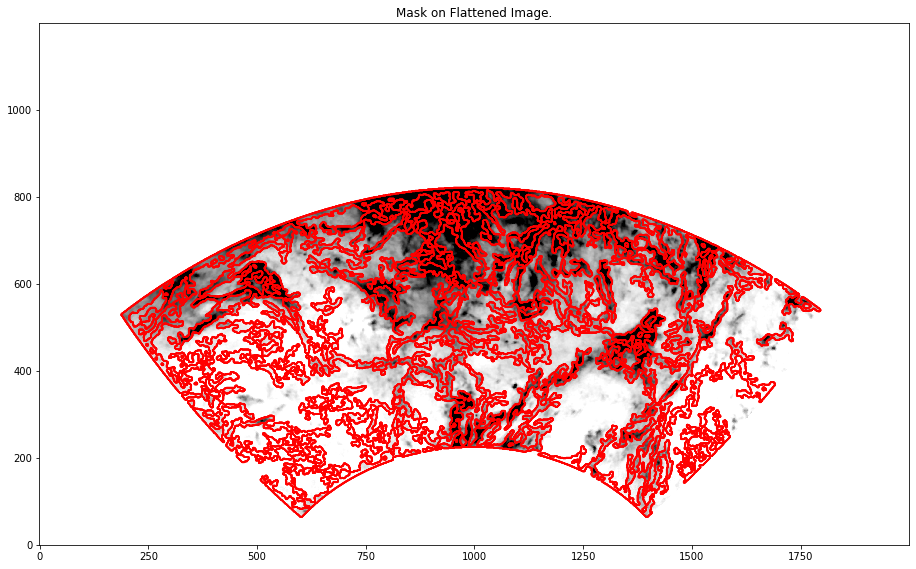

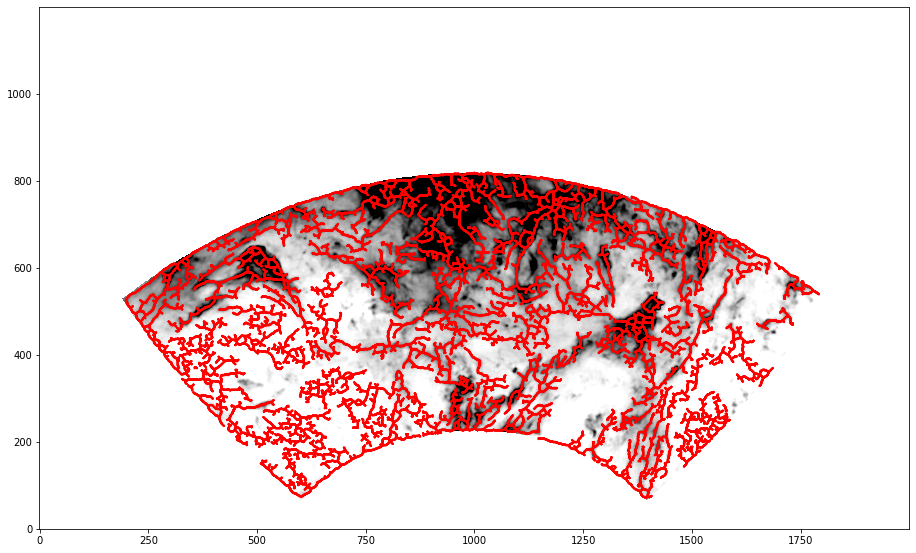

/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/fil_finder/filament.py:326: UserWarning: Graph pruning reached max iterations.
  warnings.warn("Graph pruning reached max iterations.")
/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/fil_finder/filament.py:1013: UserWarning: Ignoring adding the width to the length because the fail flag was raised for the fit.
  warnings.warn("Ignoring adding the width to the length because"
/home/filament/.pyenv/versions/3.7.11/envs/fil_project/lib/python3.7/site-packages/fil_finder/filament.py:995: UserWarning: Width could not be deconvolved from the beam width.
  warnings.warn("Width could not be deconvolved from the beam "


INFO: Auto-setting resolution to 266.667 dpi [aplpy.core]


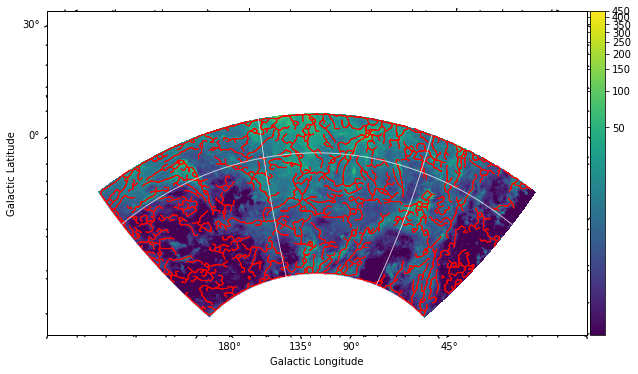

In [10]:
# fil_finder
vmin=1
vmax=450
fil = FilFinder2D(fits.PrimaryHDU(hdu.data, hdr1), distance=d * u.pc, beamwidth=bmaj* u.deg)
fil.preprocess_image(flatten_percent=95)
fil.create_mask(verbose=True, border_masking=False)
fil.medskel(verbose=True)

fil.analyze_skeletons()
fil.exec_rht()
fil.find_widths(max_dist=10 * u.pix)
fil_skeleton= fil.skeleton
fil_skeleton = fil_skeleton.astype("int")

fil_ori_ = []
fil_int = []
for f in fil.filaments:
    pa = np.rad2deg(f.orientation.value)-pa_deg_map[int(f.position()[0].value)][int(f.position()[1].value)]
    fil_ori_.append(pa)
    fil_int.append(f.total_intensity())
fil_ori_ = np.array(fil_ori_)
ypos = np.array([f.position()[0].value for f in fil.filaments])
fil_ori_ = np.where(fil_ori_<-90, fil_ori_+180, fil_ori_)
fil_ori_ = np.where(fil_ori_>90, fil_ori_-180, fil_ori_)


fig = aplpy.FITSFigure(integ_hdu,slices=[0])
fig.show_colorscale(vmin=vmin,vmax=vmax,stretch="log")
fig.add_colorbar()
fig.show_contour(fits.PrimaryHDU(fil_skeleton,hdr1),colors="r",linewidths=0.5,slices=[0])
fig.add_grid()
fig.savefig("/home/filament/Desktop/fil_result/skelton_map/%s/%s.pdf"%(region_name,fits_name))
fig.savefig("/home/filament/Desktop/fil_result/skelton_map/%s/%s.png"%(region_name,fits_name))

In [33]:
deg_ls = []
for i in range(len(fil.filaments)):
    deg_ls.append(np.rad2deg(fil.filaments[i].orientation).value)

TypeError: 'list' object is not callable

In [79]:
a = pa_deg_map[int(fil.filaments[32].position()[0].value)][int(fil.filaments[32].position()[1].value)]

-111.86171506955732


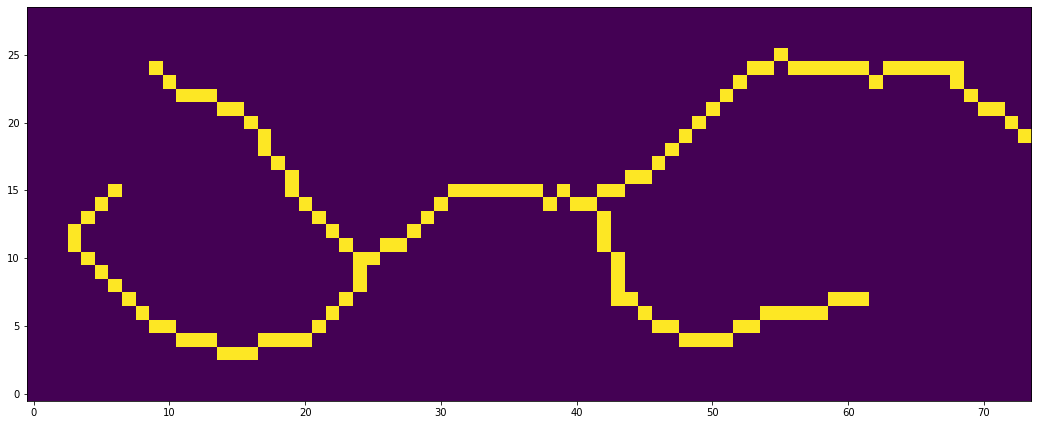

In [82]:
plt.imshow(fil.filaments[32].skeleton(),origin="lower")
print(np.rad2deg(fil.filaments[32].orientation).value-a)

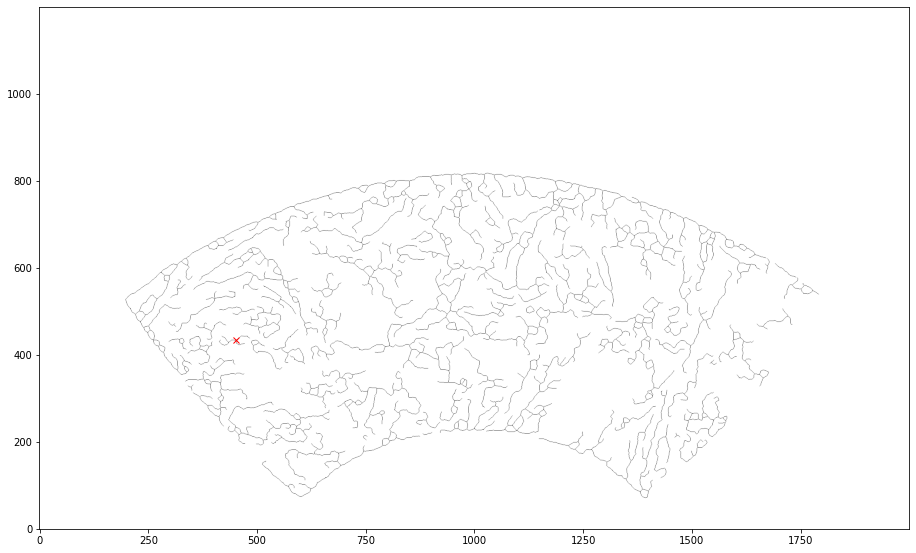

In [78]:
plt.imshow(fil_skeleton,origin="lower",cmap="Greys")
plt.plot(fil.filaments[32].position()[1],fil.filaments[32].position()[0],color="red",marker="x")


In [77]:
fil.filaments[32].position()

[<Quantity 433. pix>, <Quantity 452. pix>]

(array([4., 4., 4., 6., 1., 2., 0., 3., 0., 1., 4., 1., 3., 0., 2., 3., 1.,
        1., 2., 0., 1., 1., 1., 2., 2., 0., 1., 1., 4., 3., 0., 1., 3., 2.,
        1.]),
 array([-90.        , -84.85714286, -79.71428571, -74.57142857,
        -69.42857143, -64.28571429, -59.14285714, -54.        ,
        -48.85714286, -43.71428571, -38.57142857, -33.42857143,
        -28.28571429, -23.14285714, -18.        , -12.85714286,
         -7.71428571,  -2.57142857,   2.57142857,   7.71428571,
         12.85714286,  18.        ,  23.14285714,  28.28571429,
         33.42857143,  38.57142857,  43.71428571,  48.85714286,
         54.        ,  59.14285714,  64.28571429,  69.42857143,
         74.57142857,  79.71428571,  84.85714286,  90.        ]),
 <BarContainer object of 35 artists>)

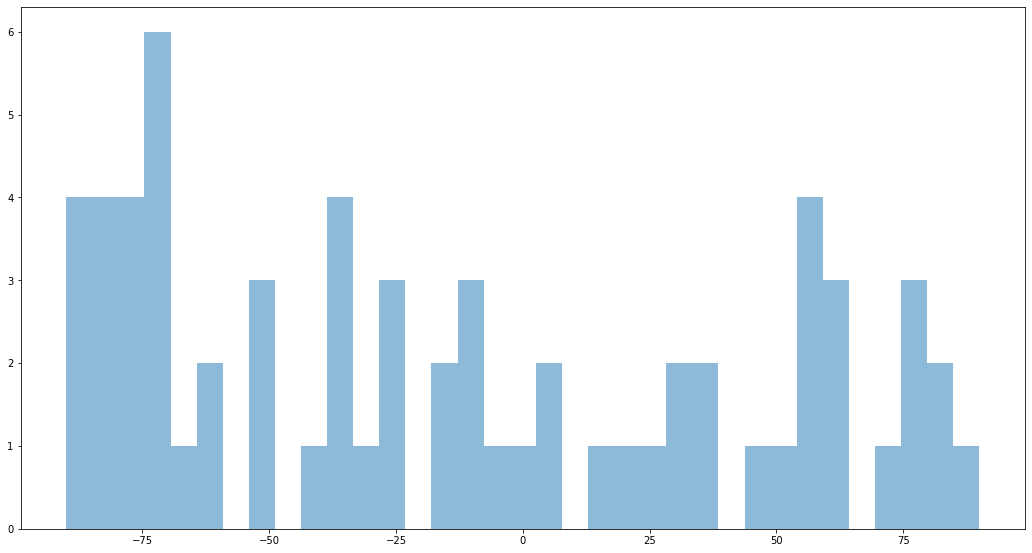

In [35]:
plt.hist(deg_ls, alpha=0.5, bins=np.linspace(-90, 90, num=36))

In [11]:
b_ls = []
if (region_name == "region1") or (region_name == "region2") or (region_name == "region5"):
    for i in range(-90,1):
        b_ls.append(i)
    b_ls = b_ls[::-1]
if (region_name == "region3") or (region_name == "region4") or (region_name == "region6"):
    for i in range(0,91):
        b_ls.append(i)
print(region_name)
print(fits_name)
total_intensity_arr = fil.total_intensity()
ruiseki = []
for k in b_ls:
    c = 0.0
    for j,f in enumerate(fil.filaments):
        pos = w.wcs_pix2world(f.position()[1],f.position()[0],0)

        if pos[1] < k:

            c += total_intensity_arr[j]
    ruiseki.append(c)
np.save("/home/filament/Desktop/fil_result/intensity_to_b/%s/ruiseki_%s.npy"%(region_name,fits_name),ruiseki)

region1
region1_V3_p120_m45


In [12]:
b_ls

[0,
 -1,
 -2,
 -3,
 -4,
 -5,
 -6,
 -7,
 -8,
 -9,
 -10,
 -11,
 -12,
 -13,
 -14,
 -15,
 -16,
 -17,
 -18,
 -19,
 -20,
 -21,
 -22,
 -23,
 -24,
 -25,
 -26,
 -27,
 -28,
 -29,
 -30,
 -31,
 -32,
 -33,
 -34,
 -35,
 -36,
 -37,
 -38,
 -39,
 -40,
 -41,
 -42,
 -43,
 -44,
 -45,
 -46,
 -47,
 -48,
 -49,
 -50,
 -51,
 -52,
 -53,
 -54,
 -55,
 -56,
 -57,
 -58,
 -59,
 -60,
 -61,
 -62,
 -63,
 -64,
 -65,
 -66,
 -67,
 -68,
 -69,
 -70,
 -71,
 -72,
 -73,
 -74,
 -75,
 -76,
 -77,
 -78,
 -79,
 -80,
 -81,
 -82,
 -83,
 -84,
 -85,
 -86,
 -87,
 -88,
 -89,
 -90]

INFO: Auto-setting vmin to -8.229e+00 [aplpy.core]
INFO: Auto-setting vmax to  8.772e+01 [aplpy.core]


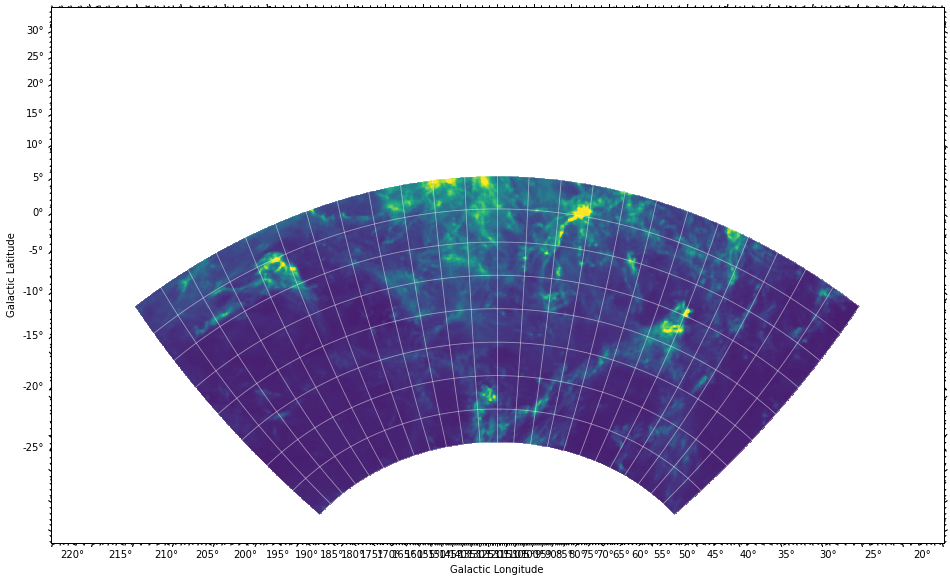

In [13]:
fig = plt.figure(figsize=(16,16))
f = aplpy.FITSFigure(hdu,figure=fig)
f.show_colorscale()
f.add_grid()
f.ticks.set_xspacing(5)
f.ticks.set_yspacing(5)
plt.show()

In [14]:
fil_tot_int = 0
for i in fil_int:
    fil_tot_int += i
np.save("/home/filament/Desktop/fil_result/np_array/fil_tot_intensity/fil_tot_int_%s.npy"%(fits_name),fil_tot_int.value)

In [15]:
np.save("/home/filament/Desktop/fil_result/np_array/number_of_filaments/num_of_fil_%s.npy"%(fits_name),np.array(len(fil.filaments)))

In [16]:
HI_tot_int = 0
for i in range(len(hdu.data)):
    HI_tot_int += np.nansum(hdu.data[i])
np.save("/home/filament/Desktop/fil_result/np_array/HI_tot_intensity/HI_tot_int_%s.npy"%(fits_name),HI_tot_int)  

In [17]:
np.round(abs(hdr1["CDELT2"]),3)

0.067

In [18]:
hdr1["CDELT1"]

-0.066667

In [19]:
(round(HI_tot_int,-3)/(hdu.data.shape[0]*hdu.data.shape[1]))/(np.round(abs(hdr1["CDELT1"]),3)*np.round(abs(hdr1["CDELT2"]),3))

798.5260265835002

In [20]:
len(fil.filaments)

65

In [21]:
HI_tot_int

8602967.37099676

In [22]:
fil_tot_int

<Quantity 3724414.09266136>

In [23]:
(fil_tot_int/HI_tot_int)*100

<Quantity 43.29220293>

In [24]:
fits_name

'region1_V3_p120_m45'

In [25]:
region_name

'region1'

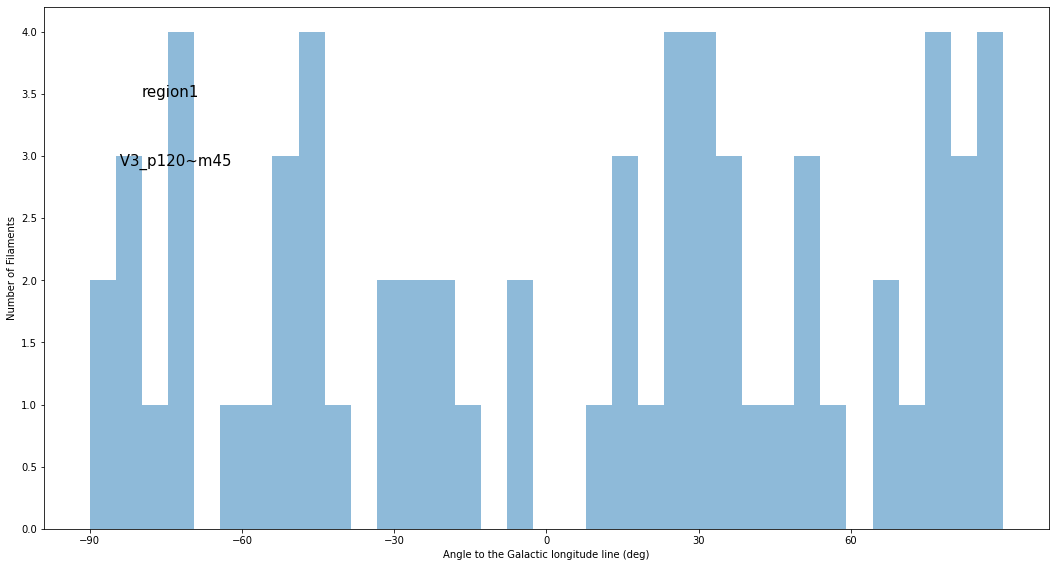

In [26]:
# histogram
fig = plt.figure()
ax1 = plt.subplot(1,1,1)
a, b, c = ax1.hist(fil_ori_, alpha=0.5, bins=np.linspace(-90, 90, num=36))
ax1.set_xlabel('Angle to the Galactic longitude line (deg)')
ax1.set_ylabel('Number of Filaments')
ax1.set_xticks(range(-90, 90, 30))

# Gaussian fitting
b_ls_ = []
for i in range(len(b)-1):
    b_ls_.append((b[i]+b[i+1])/2)

def func(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

param_ini = [10,10,10]

try:
    popt, pcov = curve_fit(func, b_ls_, a, p0=param_ini, maxfev=1000)

except RuntimeError:
    pass

try:
    fitting = func(b_ls_, popt[0], popt[1], popt[2])
except NameError:
    pass




try:
    ax1.text(0.2,0.75,str(region_name),fontsize=15, transform=fig.transFigure)
    ax1.text(0.18,0.65," %s~%s"%(fits_name.split("_")[1]+"_"+fits_name.split("_")[2],fits_name.split("_")[3]),fontsize=15, transform=fig.transFigure)
    ax1.text(0.18,0.55,"θ : %s±%s"%(np.round(popt[1],decimals=1),np.round(popt[2],decimals=1)),fontsize=15, transform=fig.transFigure)


    ax1.plot(b_ls_, fitting, 'k')

    fig.show()
    np.save("/home/filament/Desktop/fil_result/np_array/popt_%s.npy"%(fits_name),popt)
    np.save("/home/filament/Desktop/fil_result/np_array/pcov_%s.npy"%(fits_name),pcov)
except NameError:
    pass
plt.savefig("/home/filament/Desktop/fil_result/PA_hist/%s.jpg"%(fits_name))




In [26]:
"%s±%s"%(np.round(popt[1],decimals=1),np.round(popt[2],decimals=1))

'-5.1±9.3'

In [62]:
fits_name,region_name

('test_1_-50_-30', 'region1')

In [63]:
fits_name.split("_")[1]

'1'

In [64]:
array1 = np.load("/home/filament/Desktop/fil_result/intensity_to_b/%s/ruiseki_test_%s_-50_-30.npy"%(region_name,fits_name.split("_")[1]))
array2 = np.load("/home/filament/Desktop/fil_result/intensity_to_b/%s/ruiseki_test_%s_-70_-50.npy"%(region_name,fits_name.split("_")[1]))
array3 = np.load("/home/filament/Desktop/fil_result/intensity_to_b/%s/ruiseki_test_%s_-100_-70.npy"%(region_name,fits_name.split("_")[1]))
array4 = np.load("/home/filament/Desktop/fil_result/intensity_to_b/%s/ruiseki_test_%s_30_50.npy"%(region_name,fits_name.split("_")[1]))
array5 = np.load("/home/filament/Desktop/fil_result/intensity_to_b/%s/ruiseki_test_%s_50_70.npy"%(region_name,fits_name.split("_")[1]))
array6 = np.load("/home/filament/Desktop/fil_result/intensity_to_b/%s/ruiseki_test_%s_70_100.npy"%(region_name,fits_name.split("_")[1]))

In [65]:
len(b_ls[::-1])

91

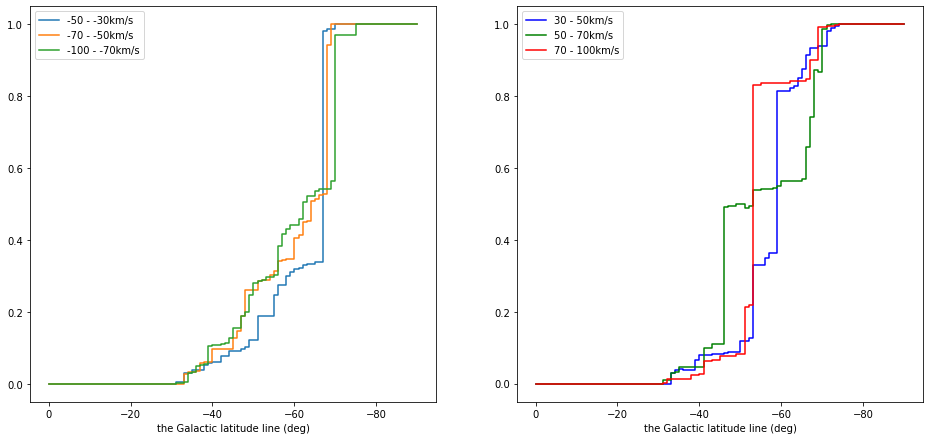

In [66]:
fig = plt.figure(figsize=(16,16))
ax1 = plt.subplot(2,2,1)
ax2 = plt.subplot(2,2,2)

ax1.step(b_ls[::-1],array1/np.max(array1),label = "-50 - -30km/s")
ax1.step(b_ls[::-1],array2/np.max(array2),label = "-70 - -50km/s")
ax1.step(b_ls[::-1],array3/np.max(array3),label = "-100 - -70km/s")
ax2.step(b_ls[::-1],array4/np.max(array4),label = "30 - 50km/s",color="blue")
ax2.step(b_ls[::-1],array5/np.max(array5),label = "50 - 70km/s",color="green")
ax2.step(b_ls[::-1],array6/np.max(array6),label = "70 - 100km/s",color="red")



ax1.invert_xaxis()

ax1.set_xlabel("the Galactic latitude line (deg)")
ax1.set_ylabel("")
ax1.legend()  
        
ax2.invert_xaxis()

ax2.set_xlabel("the Galactic latitude line (deg)")
ax2.set_ylabel("")
ax2.legend()  
plt.show()